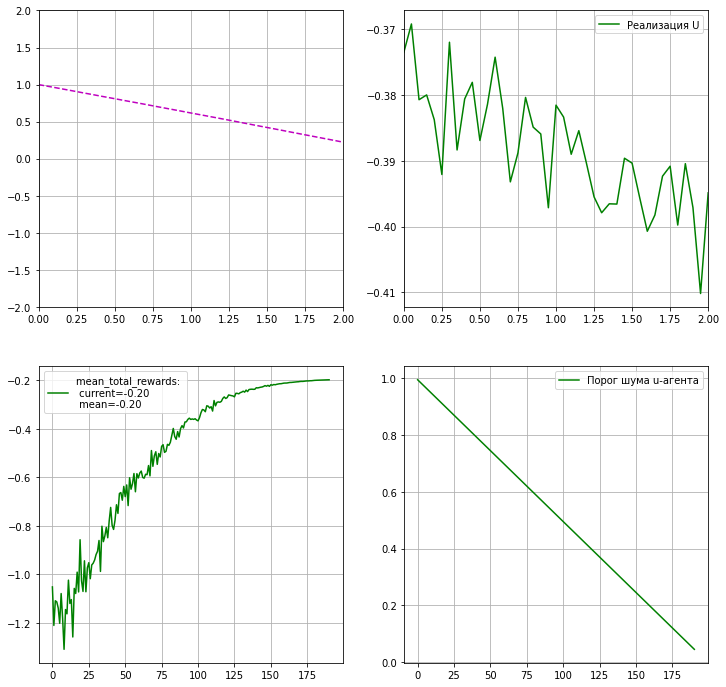

In [8]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.CEM import CEM_Continuous
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import UniformNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 200
session_n = 20

#environment initialization
env = SimpleControlProblem()

#agent initialization
pi_model = SequentialNetwork([env.state_dim, 128, env.action_dim], output_activation=nn.Tanh())
noise = UniformNoise(action_dim=env.action_dim, threshold_decrease=1/(episode_n * session_n))
agent = CEM_Continuous(env.action_min, env.action_max, pi_model, noise, pi_model_lr=1e-3, 
                       tau=1e-2, percentile_param=70, learning_iter_per_fit=16)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show, session_len=2500, session_n=session_n)